# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Syakhrul Afandi
- **Email:** m008d4ky2924@bangkit.academy
- **ID Dicoding:** syakhrul_afandi_b8m2

## Menentukan Pertanyaan Bisnis

- Apa saja 5 produk terlaris dan 5 produk paling tidak diminati?
- Bagaimana tren penjualan produk terlaris?


## Import Semua Packages/Library yang Digunakan

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Wrangling

### Gathering Data

In [246]:
#import seluruh dataframe yang dibutuhkan
order_items = pd.read_csv('https://raw.githubusercontent.com/syakhrul-afandi/ecommerce/main/Data%20E-commerce/olist_order_items_dataset.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/syakhrul-afandi/ecommerce/main/Data%20E-commerce/olist_orders_dataset.csv')
products = pd.read_csv('https://raw.githubusercontent.com/syakhrul-afandi/ecommerce/main/Data%20E-commerce/olist_products_dataset.csv')
product_category = pd.read_csv('https://raw.githubusercontent.com/syakhrul-afandi/ecommerce/main/Data%20E-commerce/product_category_name_translation.csv')

### Assessing Data

In [202]:
#menampilkan 5 baris pertama dari dataframe order_items
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [203]:
#Menampilkan ukuran dataframe order_items
order_items.shape

(112650, 7)

In [204]:
#menampilkan 5 baris pertama dari dataframe orders
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [205]:
#Menampilkan ukuran dataframe order_items
orders.shape

(99441, 8)

In [206]:
#menampilkan ringkasan informasi terkait dataframe orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [207]:
#menampilkan nilai unik dari dataframe orders
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [208]:
#menampilkan 5 baris pertama dari dataframe products
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [209]:
#menampilkan 5 baris pertama dari dataframe product_category
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Cleaning Data

#### Cek Missing Value

In [210]:
#Cek Missing Value pada dataframe order_items
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [211]:
#Cek Missing Value pada dataframe orders
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date tidak perlu dibersihkan karena tidak akan digunakan untuk menjawab kedua pertanyaan bisnis yang ada

In [247]:
#Cek Missing Value pada dataframe products
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [213]:
#Cek Missing Value pada dataframe product_category
product_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### Cek Duplikat Data

In [214]:
#Cek Duplikat Data pada dataframe orders
orders['order_id'].duplicated().sum()

0

In [215]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [216]:
#Cek Duplikat Data pada dataframe order_items
order_items.duplicated().sum()

0

In [217]:
#Cek Duplikat Data pada dataframe products
products.duplicated().sum()

0

karena tidak ada yang duplikat pada tabel products, maka nilai pada kolom product_category_name akan diisi sebagai nondefined, sedangkan kolom lainnya yang bersifat numerik akan diisi dengan mean

In [248]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [249]:
products['product_category_name'].fillna('undefined', inplace=True)
products['product_name_lenght'].fillna(products['product_name_lenght'].mean(), inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].mean(), inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].mean(), inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].mean(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].mean(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].mean(), inplace=True)

In [250]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [251]:
#Cek Duplikat Data pada dataframe product_category
product_category.duplicated().sum()

0

Tidak ada duplikat data pada keempat dataframe

## Exploratory Data Analysis (EDA)

### Explore ...

In [252]:
#Membuat dataframe dari hasil join keempat dataframe sebelumnya
df=pd.merge(pd.merge(pd.merge(order_items, orders, on='order_id', how='left'), products, on='product_id', how='outer'), product_category, on = 'product_category_name', how='outer')

In [253]:
#Menampilkan 5 baris pertama pada dataframe df
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,2017-07-26 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,2018-06-07 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,2017-08-25 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,2017-09-01 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [254]:
#Menampilkan ringkasan informasi dari dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

In [255]:
#Menampilkan ukuran dataframe df
df.shape

(112650, 23)

In [256]:
#Mengelompokkan berdasarkan kolom product_category_name_english, kemudian menghitung banyaknya dari masing masing category_name_english, lalu mengurutkan dengan tipe Descending dan menampilkan 10 data pertama
bigten = df.groupby('product_category_name_english').size().sort_values(ascending=False).head(10)

In [257]:
#Mengelompokkan berdasarkan kolom product_category_name_english, kemudian menghitung banyaknya dari masing masing category_name_english, lalu mengurutkan dengan tipe Descending dan menampilkan 10 data terakhir
lowest10 = df.groupby('product_category_name_english').size().sort_values(ascending=False).tail(10)

In [258]:
#slicing df untuk mengambil informasi yang diperlukan untuk menjawab pertanyaan 2
df_2 = df[['product_category_name_english', 'order_purchase_timestamp']]

In [259]:
#mengekstrak order_purchase_timestamp hanya menjadi tanggal saja
df_2['tanggal']=df_2['order_purchase_timestamp'].apply(lambda x: re.findall(r'^.{0,10}', x)[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_19684\2620893323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['tanggal']=df_2['order_purchase_timestamp'].apply(lambda x: re.findall(r'^.{0,10}', x)[0])


In [260]:
#Mencari jumlah pernjualan per produk per hari
df_2_clean = df_2.groupby(['product_category_name_english', 'tanggal']).size().reset_index(name='Count')

In [261]:
df_2_clean.head()

,product_category_name_english,tanggal,Count
0,agro_industry_and_commerce,2017-01-23,2
1,agro_industry_and_commerce,2017-01-31,1
2,agro_industry_and_commerce,2017-02-05,1
3,agro_industry_and_commerce,2017-02-08,1
4,agro_industry_and_commerce,2017-02-12,1


In [262]:
#slicing dataframe df_2_clean pada kolom product category name english yang bernilai bad_bath_table
final_2=df_2_clean[df_2_clean['product_category_name_english'].isin(['bed_bath_table'])]
final_2

,product_category_name_english,tanggal,Count
1895,bed_bath_table,2016-10-04,2
1896,bed_bath_table,2016-10-05,1
1897,bed_bath_table,2016-10-06,1
1898,bed_bath_table,2016-10-09,4
1899,bed_bath_table,2017-01-08,1
...,...,...,...
2488,bed_bath_table,2018-08-24,7
2489,bed_bath_table,2018-08-25,8
2490,bed_bath_table,2018-08-26,4
2491,bed_bath_table,2018-08-27,7


In [263]:
#Mengubah tipe data kolom tanggal menjadi date
final_2['tanggal'] = pd.to_datetime(final_2['tanggal'])
# Mengatur kolom 'tanggal' sebagai indeks
final_2.set_index('tanggal', inplace=True)

# Menghitung penjualan per bulan
penjualan_per_bulan = final_2.resample('M').sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_19684\2953830046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_2['tanggal'] = pd.to_datetime(final_2['tanggal'])


In [264]:
#reset index penjualan per bulan
penjualan_per_bulan.reset_index(inplace=True)
penjualan_per_bulan

,tanggal,Count
0,2016-10-31,8
1,2016-11-30,0
2,2016-12-31,0
3,2017-01-31,48
4,2017-02-28,165
5,2017-03-31,289
6,2017-04-30,274
7,2017-05-31,369
8,2017-06-30,382
9,2017-07-31,579


## Visualization & Explanatory Analysis

### Pertanyaan 1:

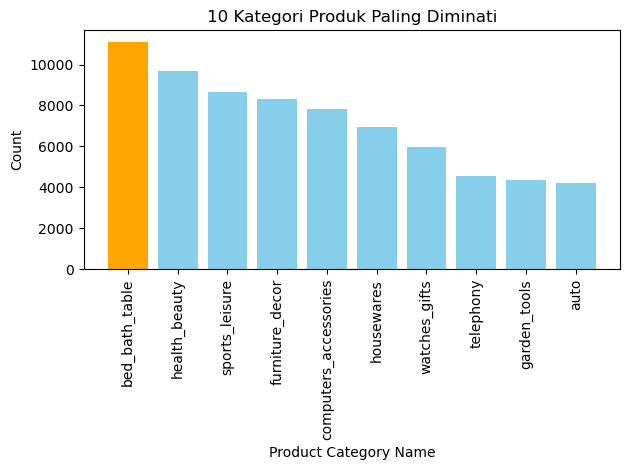

In [265]:
# Membuat barplot
plt.bar(bigten.index, bigten, color='skyblue')

# Memberikan warna berbeda untuk nilai tertinggi
max_value = bigten.max()
max_index = bigten.idxmax()
plt.bar(max_index, max_value, color='orange')

# Set label dan judul
plt.xlabel('Product Category Name')
plt.ylabel('Count')
plt.title('10 Kategori Produk Paling Diminati')

# Menampilkan plot
plt.xticks(rotation=90)  # Rotasi label x-axis supaya lebih enak dibaca
plt.tight_layout()
plt.show()

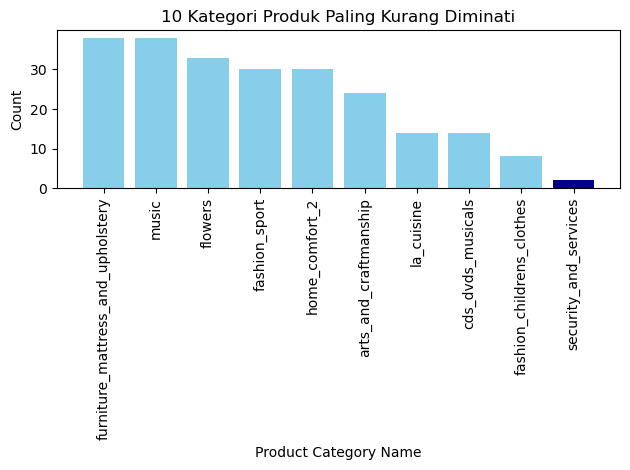

In [266]:
# Membuat barplot
plt.bar(lowest10.index, lowest10, color='skyblue')

# Memberikan warna berbeda untuk nilai terendah
min_value = lowest10.min()
min_index = lowest10.idxmin()
plt.bar(min_index, min_value, color='darkblue')

# Set label dan judul
plt.xlabel('Product Category Name')
plt.ylabel('Count')
plt.title('10 Kategori Produk Paling Kurang Diminati')

# Menampilkan plot
plt.xticks(rotation=90)  # Rotasi label x-axis supaya lebih enak dibaca
plt.tight_layout()

### Pertanyaan 2:

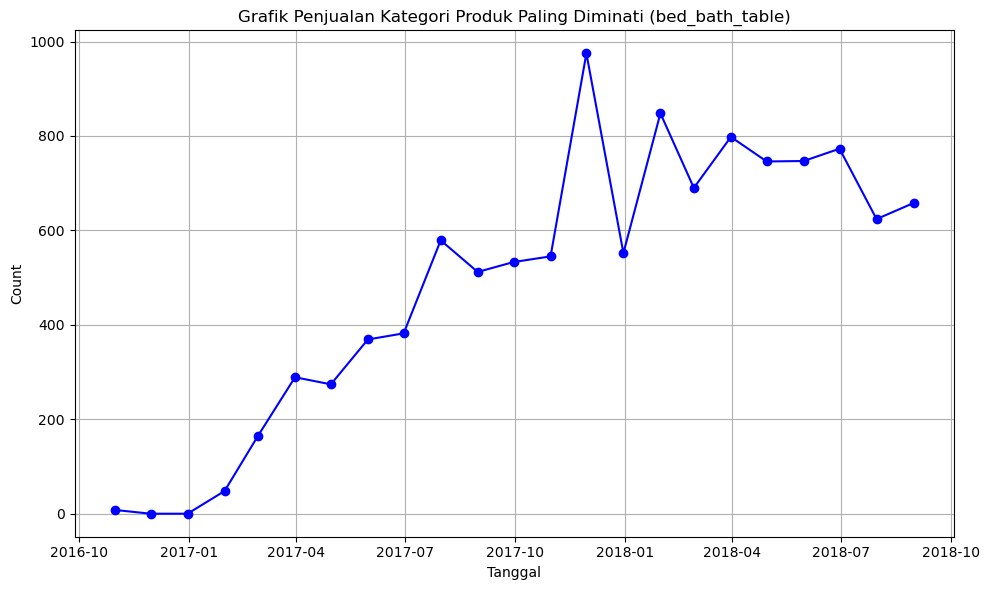

In [278]:
# Plot chart from time series
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(penjualan_per_bulan['tanggal'], penjualan_per_bulan['Count'], marker='o', color='b', linestyle='-')

# Set labels and title
ax.set_xlabel('Tanggal')
ax.set_ylabel('Count')
ax.set_title('Grafik Penjualan Kategori Produk Paling Diminati (bed_bath_table)')

# Show the plot
ax.grid(True)
plt.tight_layout()

# Display the plot using st.pyplot
plt.show()

## Conclusion

- Conclution Pertanyaan 1:
1. 10 Produk Terlaris yakni: bed_bath_table, health_beauty, sports_leisure, furniture_decor, computers_accessories, housewares, mwatches_gifts, telephony, garden_tools, dan auto
2. 10 Produk Paling Kurang Diminati: security_and_services, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, arts_and_craftmanship, fashion_sport, home_comfort_2, flowers, furniture_mattres_and_upholstery, music
- Conclution pertanyaan 2:
Dari plot yang terbentuk, dapat disimpulkan bahwa tren penjualan bed_bath_table memiliki tren naik dari waktu ke waktu

# CLUSTERING

In [268]:
#Menyiapkan dataframe untuk clustering product
Analisis = pd.merge(df[['product_id', 'product_category_name_english', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price']], df.groupby('product_id').size().reset_index(name='count_sold'), on='product_id', how='outer')
Analisis

,product_id,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,58.90,9
1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,55.90,9
2,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,64.90,9
3,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,58.90,9
4,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,58.90,9
...,...,...,...,...,...,...,...,...
112645,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,100.0,16.0,16.0,16.0,39.99,3
112646,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,100.0,16.0,16.0,16.0,39.99,3
112647,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes,300.0,30.0,20.0,20.0,89.99,2
112648,8cfc3506cedc0626364457d254429118,fashion_childrens_clothes,300.0,30.0,20.0,20.0,89.99,2


In [269]:
Analisis.duplicated().sum()

70242

In [270]:
#Mengelompokkan berdasarkan  kolom dengan agregasi mean dan sum pada kolom-kolom tertentu
clustering = Analisis.groupby('product_id').agg({
    'product_weight_g': 'mean',
    'product_length_cm': 'mean',
    'product_height_cm': 'mean',
    'product_width_cm': 'mean',
    'price': 'mean',
    'count_sold': 'sum'
}).reset_index()
clustering

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold
0,00066f42aeeb9f3007548bb9d3f33c38,300.0,20.0,16.0,16.0,101.65,1
1,00088930e925c41fd95ebfe695fd2655,1225.0,55.0,10.0,26.0,129.90,1
2,0009406fd7479715e4bef61dd91f2462,300.0,45.0,15.0,35.0,229.00,1
3,000b8f95fcb9e0096488278317764d19,550.0,19.0,24.0,12.0,58.90,4
4,000d9be29b5207b54e86aa1b1ac54872,250.0,22.0,11.0,15.0,199.00,1
...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,1400.0,42.0,25.0,15.0,114.99,4
32947,fff81cc3158d2725c0655ab9ba0f712c,58.0,16.0,16.0,11.0,90.00,1
32948,fff9553ac224cec9d15d49f5a263411f,150.0,16.0,13.0,11.0,32.00,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,150.0,16.0,4.0,13.0,33.99,25


In [271]:
#Join ke dataframe products dan product_category untuk mendapatkanproduct_category_name_english kembali
clustering = pd.merge(pd.merge(clustering, products[['product_id', 'product_category_name']], on='product_id', how='outer'), product_category, on='product_category_name', how='outer')
clustering

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold,product_category_name,product_category_name_english
0,00066f42aeeb9f3007548bb9d3f33c38,300.0,20.0,16.0,16.0,101.650000,1,perfumaria,perfumery
1,005030ef108f58b46b78116f754d8d38,50.0,16.0,5.0,11.0,14.759231,169,perfumaria,perfumery
2,009c09f439988bc06a93d6b8186dce73,150.0,20.0,20.0,20.0,132.400000,1,perfumaria,perfumery
3,00baba5b58e274d0332a0c8a0a66f877,200.0,18.0,7.0,12.0,47.900000,144,perfumaria,perfumery
4,00c3e35b00dd00ab864d4a94c1b97e66,512.0,30.0,12.0,18.0,99.990000,4,perfumaria,perfumery
...,...,...,...,...,...,...,...,...,...
32946,ab0a97f604550b5b5b99180a6dc04461,150.0,60.0,11.0,11.0,14.900000,9,tablets_impressao_imagem,tablets_printing_image
32947,b29c1749f99da888ea322a01420d5220,1100.0,30.0,5.0,22.0,889.990000,1,tablets_impressao_imagem,tablets_printing_image
32948,fa9d34c32a70b4e50a4c2c8c2c42051f,100.0,16.0,6.0,14.0,29.990000,1,tablets_impressao_imagem,tablets_printing_image
32949,6c7a0a349ad11817745e3ad58abd5c79,1225.0,27.0,35.0,15.0,183.290000,1,seguros_e_servicos,security_and_services


In [272]:
#Clustering Produk dengan fitur-fitur pada tabel di atas dengan menggunakan metode k-means menjadi 3 cluster, yakni produk paling laku, produk laku, dan produk kurang laku
np.random.seed(21060)
X = clustering[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price', 'count_sold' ]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clustering['cluster']=kmeans.predict(X)
clustering

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold,product_category_name,product_category_name_english,cluster
0,00066f42aeeb9f3007548bb9d3f33c38,300.0,20.0,16.0,16.0,101.650000,1,perfumaria,perfumery,0
1,005030ef108f58b46b78116f754d8d38,50.0,16.0,5.0,11.0,14.759231,169,perfumaria,perfumery,0
2,009c09f439988bc06a93d6b8186dce73,150.0,20.0,20.0,20.0,132.400000,1,perfumaria,perfumery,0
3,00baba5b58e274d0332a0c8a0a66f877,200.0,18.0,7.0,12.0,47.900000,144,perfumaria,perfumery,0
4,00c3e35b00dd00ab864d4a94c1b97e66,512.0,30.0,12.0,18.0,99.990000,4,perfumaria,perfumery,0
...,...,...,...,...,...,...,...,...,...,...
32946,ab0a97f604550b5b5b99180a6dc04461,150.0,60.0,11.0,11.0,14.900000,9,tablets_impressao_imagem,tablets_printing_image,0
32947,b29c1749f99da888ea322a01420d5220,1100.0,30.0,5.0,22.0,889.990000,1,tablets_impressao_imagem,tablets_printing_image,0
32948,fa9d34c32a70b4e50a4c2c8c2c42051f,100.0,16.0,6.0,14.0,29.990000,1,tablets_impressao_imagem,tablets_printing_image,0
32949,6c7a0a349ad11817745e3ad58abd5c79,1225.0,27.0,35.0,15.0,183.290000,1,seguros_e_servicos,security_and_services,0


In [273]:
#Menampilkan jumlah produk terjual untuk cluster 0
clustering[clustering['cluster']==0]['count_sold'].sum()

2534568

In [274]:
#Menampilkan jumlah produk terjual untuk cluster 1
clustering[clustering['cluster']==1]['count_sold'].sum()

151148

In [275]:
#Menampilkan jumlah produk terjual untuk cluster 2
clustering[clustering['cluster']==2]['count_sold'].sum()

1415444

Dari ketiga output di atas, dapat disimpulkan cluster 0 merupakan cluster dengan tingkat penjualan 'Sangat Laku', cluster 1 dengan tingkat penjualan 'Kurang Laku', sedangkan cluster 2 dengan tingkat penjualan 'Cukup Laku' 

In [276]:
#Memberi nilai Tingkat KElakuan berdasarkan cluster
output = clustering
output['Tingkat Penjualan'] = np.where(output['cluster'] == 0, 'Sangat Laku',
                                    np.where(output['cluster'] == 1, 'Kurang Laku', 'Cukup Laku'))
output = output.drop(columns=['cluster'])
output


,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,count_sold,product_category_name,product_category_name_english,Tingkat Penjualan
0,00066f42aeeb9f3007548bb9d3f33c38,300.0,20.0,16.0,16.0,101.650000,1,perfumaria,perfumery,Sangat Laku
1,005030ef108f58b46b78116f754d8d38,50.0,16.0,5.0,11.0,14.759231,169,perfumaria,perfumery,Sangat Laku
2,009c09f439988bc06a93d6b8186dce73,150.0,20.0,20.0,20.0,132.400000,1,perfumaria,perfumery,Sangat Laku
3,00baba5b58e274d0332a0c8a0a66f877,200.0,18.0,7.0,12.0,47.900000,144,perfumaria,perfumery,Sangat Laku
4,00c3e35b00dd00ab864d4a94c1b97e66,512.0,30.0,12.0,18.0,99.990000,4,perfumaria,perfumery,Sangat Laku
...,...,...,...,...,...,...,...,...,...,...
32946,ab0a97f604550b5b5b99180a6dc04461,150.0,60.0,11.0,11.0,14.900000,9,tablets_impressao_imagem,tablets_printing_image,Sangat Laku
32947,b29c1749f99da888ea322a01420d5220,1100.0,30.0,5.0,22.0,889.990000,1,tablets_impressao_imagem,tablets_printing_image,Sangat Laku
32948,fa9d34c32a70b4e50a4c2c8c2c42051f,100.0,16.0,6.0,14.0,29.990000,1,tablets_impressao_imagem,tablets_printing_image,Sangat Laku
32949,6c7a0a349ad11817745e3ad58abd5c79,1225.0,27.0,35.0,15.0,183.290000,1,seguros_e_servicos,security_and_services,Sangat Laku
